In [8]:
# template.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate, RXXGate, RYYGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 5

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

is_clique = True

if is_clique:
    for step in range(trotter_steps):
        # Hamiltonian evolution under sum_{j≠k} (X_j X_k + Y_j Y_k)
        for j in range(n_qubits):
            for k in range(n_qubits):
                if j != k:
                    qc.append(RXXGate(4 * gamma / trotter_steps), [j, k])
                    qc.append(RYYGate(4 * gamma / trotter_steps), [j, k])
else:
    for i in range(n_qubits):
        qc.h(i)

for step in range(trotter_steps):
    qc.rz(-2 * gamma * -0.25, 3)  # from: [('I', 'a'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.25, 4)  # from: [('I', 'a'), ('Z', 'e')]
    qc.rz(-2 * gamma * -0.25, 3)  # from: [('I', 'b'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.25, 4)  # from: [('I', 'b'), ('Z', 'e')]
    qc.rz(-2 * gamma * -0.25, 3)  # from: [('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.25, 4)  # from: [('I', 'c'), ('Z', 'e')]
    qc.rz(-2 * gamma * -0.25, 0)  # from: [('Z', 'a'), ('I', 'd')]
    qc.rz(-2 * gamma * -0.25, 0)  # from: [('Z', 'a'), ('I', 'e')]
    qc.rzz(-2 * gamma * 0.25, 0, 3)  # from: [('Z', 'a'), ('Z', 'd')]
    qc.rzz(-2 * gamma * 0.25, 0, 4)  # from: [('Z', 'a'), ('Z', 'e')]
    qc.rz(-2 * gamma * -0.25, 1)  # from: [('Z', 'b'), ('I', 'd')]
    qc.rz(-2 * gamma * -0.25, 1)  # from: [('Z', 'b'), ('I', 'e')]
    qc.rzz(-2 * gamma * 0.25, 1, 3)  # from: [('Z', 'b'), ('Z', 'd')]
    qc.rzz(-2 * gamma * 0.25, 1, 4)  # from: [('Z', 'b'), ('Z', 'e')]
    qc.rz(-2 * gamma * -0.25, 2)  # from: [('Z', 'c'), ('I', 'd')]
    qc.rz(-2 * gamma * -0.25, 2)  # from: [('Z', 'c'), ('I', 'e')]
    qc.rzz(-2 * gamma * 0.25, 2, 3)  # from: [('Z', 'c'), ('Z', 'd')]
    qc.rzz(-2 * gamma * 0.25, 2, 4)  # from: [('Z', 'c'), ('Z', 'e')]

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())


{'00011': 85, '00101': 86, '11000': 245, '00111': 263, '10100': 26, '10000': 33, '00000': 37, '01001': 30, '10001': 22, '01000': 27, '01100': 19, '00110': 74, '00001': 10, '10110': 1, '10010': 22, '01010': 20, '11001': 3, '00100': 7, '00010': 3, '01101': 3, '01111': 2, '10011': 2, '11010': 2, '11110': 1, '11100': 1}


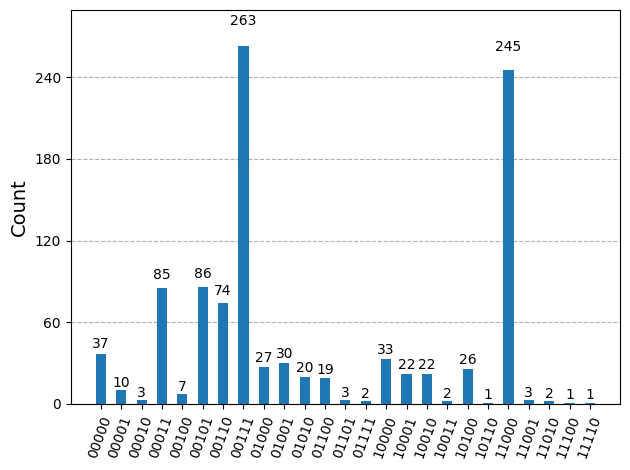

In [9]:
plot_histogram(result.get_counts())